In [1]:
import pandas as pd
# calendar = pd.read_csv('calendar.csv.gz')
# listings = pd.read_csv('listings.csv')
listings2 = pd.read_csv('listings.csv.gz', low_memory=False)
# neighborhoods = pd.read_csv('neighbourhoods.csv')
# neighborhoods_geojson = pd.read_csv('neighbourhoods.geojson')
# reviews = pd.read_csv('reviews.csv')
# reviews2 = pd.read_csv('reviews.csv.gz')


In [2]:
listings2.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [3]:
len(listings2['neighbourhood_group_cleansed'].unique())

5

In [4]:
listings_short = listings2.filter(['price','accommodates','neighbourhood','neighbourhood_group_cleansed','zipcode','review_scores_rating', 'room_type','number_of_reviews' ], axis=1)

In [5]:
listings_short.head(10)

,price,accommodates,neighbourhood,neighbourhood_group_cleansed,zipcode,review_scores_rating,room_type,number_of_reviews
0,$59.00,2,NaN,Brooklyn,11221,73.0,Private room,14
1,$59.00,3,Harlem,Manhattan,10026,93.0,Private room,174
2,$149.00,4,Kensington,Brooklyn,11218,98.0,Private room,9
3,$225.00,2,Midtown,Manhattan,10018,95.0,Entire home/apt,38
4,$89.00,4,Red Hook,Brooklyn,11231,79.0,Private room,22
5,$70.00,2,Williamsburg,Brooklyn,11206,98.0,Private room,36
6,$200.00,8,Prospect Heights,Brooklyn,11238,99.0,Entire home/apt,140
7,$150.00,2,Harlem,Manhattan,10027,NaN,Private room,0
8,$89.00,3,Clinton Hill,Brooklyn,11238,91.0,Entire home/apt,217
9,$55.00,2,Clinton Hill,Brooklyn,11205,92.0,Private room,27


In [6]:
import requests

r = requests.get("http://www.zillow.com/webservice/GetRegionChildren.htm?zws-id=X1-ZWz188d4jlv3m3_9k5bc&state=ny&city=new_york&childtype=zipcode")
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content)
zip_zindex = soup.findAll(['name', 'zindex'])
zipcode_list = soup.findAll('name')
median_prices_list = soup.findAll('zindex')


In [7]:
zipcodes={}
for element in zip_zindex:
    if element in zipcode_list:
        zipcodes[element.contents[0]]={'zipcode':element.contents}
        lastzip = element.contents
    if element in median_prices_list:
        zipcodes[lastzip[0]]={'med_zillow_price': element.contents[0]}


In [8]:
zipcodes

{'10025': {'med_zillow_price': '1034300'},
 '10023': {'zipcode': ['10023']},
 '10002': {'med_zillow_price': '877400'},
 '10467': {'med_zillow_price': '310500'},
 '11226': {'med_zillow_price': '633400'},
 '10016': {'zipcode': ['10016']},
 '11375': {'med_zillow_price': '770800'},
 '11235': {'med_zillow_price': '578700'},
 '10029': {'med_zillow_price': '719400'},
 '10009': {'med_zillow_price': '1051700'},
 '10011': {'zipcode': ['10011']},
 '10128': {'zipcode': ['10128']},
 '11201': {'med_zillow_price': '986200'},
 '10462': {'med_zillow_price': '104300'},
 '10456': {'med_zillow_price': '254600'},
 '11206': {'zipcode': ['11206']},
 '10003': {'med_zillow_price': '1410600'},
 '10463': {'med_zillow_price': '509700'},
 '11212': {'med_zillow_price': '312000'},
 '11230': {'med_zillow_price': '839000'},
 '11209': {'med_zillow_price': '825900'},
 '10024': {'zipcode': ['10024']},
 '11221': {'med_zillow_price': '728600'},
 '11214': {'med_zillow_price': '588100'},
 '10019': {'zipcode': ['10019']},
 '1

In [9]:
import pandas as pd
df = pd.DataFrame(zipcodes)
data = df.T
data["zip"]=data.index
data2 = data.drop(columns = 'zipcode')

In [11]:
full_data = data2.set_index('zip').join(listings_short.set_index('zipcode'))

In [ ]:
full_data.head()

In [13]:
import seaborn as sns
removed_null = full_data.dropna()
removed_null.dtypes

med_zillow_price                 object
price                            object
accommodates                    float64
neighbourhood                    object
neighbourhood_group_cleansed     object
review_scores_rating            float64
room_type                        object
number_of_reviews               float64
dtype: object

In [14]:
cols = ['med_zillow_price', 'price']
removed_null[cols] = removed_null[cols].apply(pd.to_numeric, errors='coerce', axis=1)
removed_null.dtypes

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


med_zillow_price                float64
price                           float64
accommodates                    float64
neighbourhood                    object
neighbourhood_group_cleansed     object
review_scores_rating            float64
room_type                        object
number_of_reviews               float64
dtype: object

In [15]:
full_data.corr()

,accommodates,review_scores_rating,number_of_reviews
accommodates,1.000000,-0.015865,0.106964
review_scores_rating,-0.015865,1.000000,0.016059
number_of_reviews,0.106964,0.016059,1.000000


In [16]:
airbnb = full_data.dropna()
airbnb.head()

,med_zillow_price,price,accommodates,neighbourhood,neighbourhood_group_cleansed,review_scores_rating,room_type,number_of_reviews
10001,2188500,$150.00,4.0,Chelsea,Manhattan,89.0,Entire home/apt,394.0
10001,2188500,$123.00,2.0,Chelsea,Manhattan,92.0,Private room,356.0
10001,2188500,$130.00,2.0,Chelsea,Manhattan,96.0,Entire home/apt,19.0
10001,2188500,$250.00,2.0,Chelsea,Manhattan,96.0,Entire home/apt,18.0
10001,2188500,$226.00,2.0,Chelsea,Manhattan,90.0,Entire home/apt,26.0


In [17]:
def remove_apostrophe(dataframe):
    dataframe.columns = [x.replace("'","") for x in dataframe.columns]
    
def remove_period(dataframe):
    dataframe.columns = [x.replace(".","") for x in dataframe.columns]
    
def remove_dash(dataframe):
    dataframe.columns = [x.replace("-","") for x in dataframe.columns]
    
def remove_slash(dataframe):
    dataframe.columns = [x.replace("/","") for x in dataframe.columns]
    
def remove_spaces(dataframe):
    dataframe.columns = [x.replace(" ","") for x in dataframe.columns]
    
remove_apostrophe(airbnb)
remove_period(airbnb)
remove_dash(airbnb)
remove_slash(airbnb)
remove_spaces(airbnb)

In [18]:
airbnb['price'] = airbnb.price.replace('[\$,]', '', regex=True).astype(float)
airbnb['med_zillow_price'] = airbnb.med_zillow_price.apply(pd.to_numeric, errors='coerce')
airbnb['borough'] = airbnb['neighbourhood_group_cleansed']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [19]:
airbnb.head()

,med_zillow_price,price,accommodates,neighbourhood,neighbourhood_group_cleansed,review_scores_rating,room_type,number_of_reviews,borough
10001,2188500,150.0,4.0,Chelsea,Manhattan,89.0,Entire home/apt,394.0,Manhattan
10001,2188500,123.0,2.0,Chelsea,Manhattan,92.0,Private room,356.0,Manhattan
10001,2188500,130.0,2.0,Chelsea,Manhattan,96.0,Entire home/apt,19.0,Manhattan
10001,2188500,250.0,2.0,Chelsea,Manhattan,96.0,Entire home/apt,18.0,Manhattan
10001,2188500,226.0,2.0,Chelsea,Manhattan,90.0,Entire home/apt,26.0,Manhattan


In [20]:
airbnb.corr()

,med_zillow_price,price,accommodates,review_scores_rating,number_of_reviews
med_zillow_price,1.000000,0.162101,0.037396,-0.003153,-0.015086
price,0.162101,1.000000,0.331392,0.033797,-0.015055
accommodates,0.037396,0.331392,1.000000,-0.004998,0.101848
review_scores_rating,-0.003153,0.033797,-0.004998,1.000000,0.017148
number_of_reviews,-0.015086,-0.015055,0.101848,0.017148,1.000000


In [21]:
abs(airbnb.corr())>0.75

,med_zillow_price,price,accommodates,review_scores_rating,number_of_reviews
med_zillow_price,True,False,False,False,False
price,False,True,False,False,False
accommodates,False,False,True,False,False
review_scores_rating,False,False,False,True,False
number_of_reviews,False,False,False,False,True


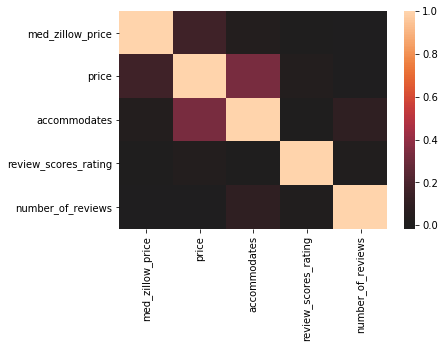

In [22]:
sns.heatmap(airbnb.corr(), center=0);

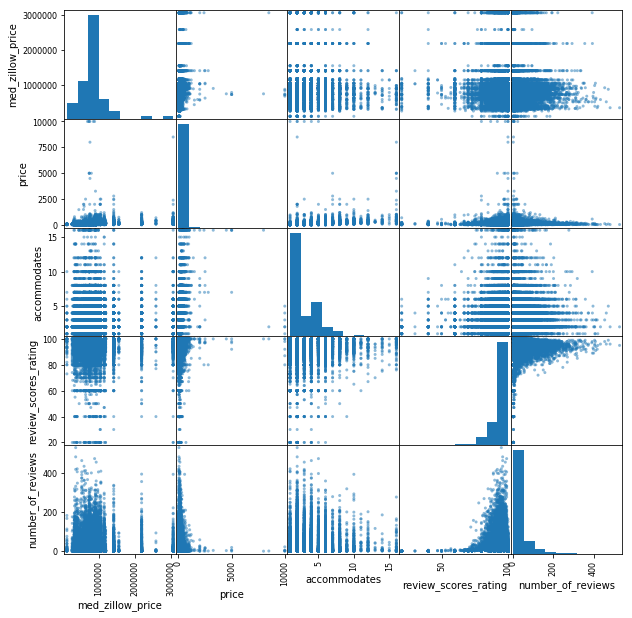

In [23]:
pd.plotting.scatter_matrix(airbnb,figsize  = [10, 10]);

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
formula = "price ~ med_zillow_price+accommodates+review_scores_rating+number_of_reviews"
model = ols(formula= formula, data=airbnb).fit()

In [26]:
formula

'price ~ med_zillow_price+accommodates+review_scores_rating+number_of_reviews'

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     934.3
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:41:35   Log-Likelihood:            -1.6070e+05
No. Observations:               23799   AIC:                         3.214e+05
Df Residuals:                   23794   BIC:                         3.214e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -135.0716     15.891     -8.500      0.000    -166.218    -103.925
med_zillow_price      8.296e-05   3.36e-06     24.723      0.000    7.64e-05    8.95e-05
accommodates            38.1755      0.700     54.559      0.000      36.804      39.547
review_scores_rating     1.0012      0.164      6.093      0.000       0.679       1.323
number_of_reviews       -0.2301      0.030     -7.776      0.000      -0.288      -0.172
==============================================================================
Omnibus:                    65190.613   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2286973653.018
Skew:                          34.566   Prob(JB):                         0.00
Kurtosis:                    1520.073   Cond. No.                     1.11e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
neighborhoods = pd.get_dummies(airbnb["neighbourhood"], prefix="hood", drop_first = True)
boroughs = pd.get_dummies(airbnb['borough'], prefix = "borough", drop_first = True)
price = airbnb['price']
med_zillow_price = airbnb['med_zillow_price']
accommodates = airbnb['accommodates']
review_scores_rating = airbnb['review_scores_rating']
number_of_reviews = airbnb['number_of_reviews']
#create a dataframe with categorial dummy variables and numerical variables
data_fin = pd.concat([boroughs, price, med_zillow_price, accommodates, review_scores_rating, number_of_reviews], axis=1)

In [73]:
def remove_apostrophe(dataframe):
    dataframe.columns = [x.replace("'","") for x in dataframe.columns]
    
def remove_period(dataframe):
    dataframe.columns = [x.replace(".","") for x in dataframe.columns]
    
def remove_dash(dataframe):
    dataframe.columns = [x.replace("-","") for x in dataframe.columns]
    
def remove_slash(dataframe):
    dataframe.columns = [x.replace("/","") for x in dataframe.columns]

def remove_spaces(dataframe):
    dataframe.columns = [x.replace(" ","") for x in dataframe.columns]
    
remove_apostrophe(data_fin)
remove_period(data_fin)
remove_dash(data_fin)
remove_slash(data_fin)
remove_spaces(data_fin)

In [74]:
data_fin.head()

,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_StatenIsland,price,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
10001,0,1,0,0,150.0,2188500,4.0,89.0,394.0
10001,0,1,0,0,123.0,2188500,2.0,92.0,356.0
10001,0,1,0,0,130.0,2188500,2.0,96.0,19.0
10001,0,1,0,0,250.0,2188500,2.0,96.0,18.0
10001,0,1,0,0,226.0,2188500,2.0,90.0,26.0


In [45]:
outcome = 'price'
predictors = data_fin.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + " ~ " + pred_sum

In [46]:
model2 = ols(formula = formula, data=data_fin).fit()

In [47]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     478.9
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:19:24   Log-Likelihood:            -1.6066e+05
No. Observations:               23799   AIC:                         3.213e+05
Df Residuals:                   23790   BIC:                         3.214e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -141.1660     19.310     -7.310      0.000    -179.015    -103.317
borough_Brooklyn        11.2327     11.628      0.966      0.334     -11.559      34.024
borough_Manhattan       35.4227     12.024      2.946      0.003      11.855      58.990
borough_Queens          -3.7982     11.872     -0.320      0.749     -27.067      19.471
borough_StatenIsland   -19.3691     17.235     -1.124      0.261     -53.151      14.413
med_zillow_price       6.36e-05      4e-06     15.907      0.000    5.58e-05    7.14e-05
accommodates            38.3984      0.699     54.919      0.000      37.028      39.769
review_scores_rating     1.0641      0.164      6.471      0.000       0.742       1.386
number_of_reviews       -0.2309      0.030     -7.804      0.000      -0.289      -0.173
==============================================================================
Omnibus:                    65290.908   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2311758619.218
Skew:                          34.707   Prob(JB):                         0.00
Kurtosis:                    1528.275   Cond. No.                     1.92e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sns.boxplot(x=airbnb['borough'] , y=airbnb['price'], data = airbnb)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
y = airbnb['price']
predictors = data_fin.drop('price', axis=1)
linreg = LinearRegression()
linreg.fit(predictors, y)
linreg.coef_

array([ 1.12326820e+01,  3.54226610e+01, -3.79819687e+00, -1.93690942e+01,
        6.35988400e-05,  3.83983899e+01,  1.06413037e+00, -2.30900845e-01])

In [ ]:
linreg.intercept_

In [51]:
airbnb['neighborhood'].value_counts()

Brooklyn         12111
Manhattan         7439
Queens            3662
Bronx              333
Staten Island      254
Name: borough, dtype: int64

In [34]:
airbnb['borough'].value_counts()

Brooklyn         12111
Manhattan         7439
Queens            3662
Bronx              333
Staten Island      254
Name: borough, dtype: int64

In [53]:
#Uses the Feature Ranking w/ Recursive Feature Elimination Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Choose n top features based on p-values
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(predictors, airbnb["price"])

In [54]:
#Responds with variables and whether they meet top n features or not
selector.support_ 

array([ True,  True,  True,  True, False,  True, False, False])

In [55]:
#Responds with ranking of variables
selector.ranking_

array([1, 1, 1, 1, 4, 1, 2, 3])

In [56]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 40.87469539  85.74398277   8.77451988 -15.40759084  38.3610754 ]
-26.691590036556164


In [ ]:
#Next thing to do is figure out an automated way to train just the "yes" variables
#Google model fitting using feature ranking!!

In [68]:
features = data_fin.drop('price', axis=1)
target = data_fin.price

In [76]:
data_fin.head()

,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_StatenIsland,price,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
10001,0,1,0,0,150.0,2188500,4.0,89.0,394.0
10001,0,1,0,0,123.0,2188500,2.0,92.0,356.0
10001,0,1,0,0,130.0,2188500,2.0,96.0,19.0
10001,0,1,0,0,250.0,2188500,2.0,96.0,18.0
10001,0,1,0,0,226.0,2188500,2.0,90.0,26.0


In [96]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
#Create training and testing set. Training is 80% of entire set
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=32,test_size=0.2)

In [97]:
from sklearn import preprocessing
from sklearn import pipeline

scaler = preprocessing.StandardScaler()

In [98]:
#Take out all categorical variables, because there's no point in scaling 1's and 0's
scaler.fit(features.iloc[:,4:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [101]:
#Creata new dataframe with new scaled numerical variables
features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,4:]), columns=X_train.columns[4:], index=X_train.index)

#Add back in your categorical variables
features_scaled_train['borough_Brooklyn']= X_train.borough_Brooklyn
features_scaled_train['borough_Manhattan']= X_train.borough_Manhattan
features_scaled_train['borough_Queens']= X_train.borough_Queens
features_scaled_train['borough_StatenIsland']= X_train.borough_StatenIsland


features_scaled_train.head()

#if there's a value less than the mean, the scaled number will be negative. This is because the scaled number
#is z= (x-u)/s.
#x = value
#u = mean of training samples
#s = standard deviation

,med_zillow_price,accommodates,review_scores_rating,number_of_reviews,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_StatenIsland
11105,-0.498693,0.025029,0.744837,-0.624366,0,0,1,0
11434,-1.248463,-0.492938,0.133110,0.274129,0,0,1,0
11222,-0.018072,0.025029,-0.478617,-0.602451,1,0,0,0
11226,-0.539640,-0.492938,0.744837,-0.449050,1,0,0,0
10025,0.461301,0.542996,0.010765,-0.492879,0,1,0,0


In [92]:
X_test.head()

,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_StatenIsland,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
11355,0,0,1,0,583500,2.0,97.0,72.0
10001,0,1,0,0,2188500,1.0,88.0,67.0
11216,1,0,0,0,741000,2.0,96.0,39.0
10030,0,1,0,0,567600,2.0,100.0,2.0
11419,0,0,1,0,392000,2.0,93.0,157.0


In [100]:
features_scaled_test = pd.DataFrame(scaler.transform(X_test.iloc[:,4:]), columns=X_test.columns[4:], index=X_test.index)

features_scaled_test['borough_Brooklyn']= X_test.borough_Brooklyn
features_scaled_test['borough_Manhattan']= X_test.borough_Manhattan
features_scaled_test['borough_Queens']= X_test.borough_Queens
features_scaled_test['borough_StatenIsland']= X_test.borough_StatenIsland

features_scaled_test.head()

,med_zillow_price,accommodates,review_scores_rating,number_of_reviews,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_StatenIsland
11355,-0.664227,-0.492938,0.377801,0.931564,0,0,1,0
10001,3.343033,-1.010904,-0.723307,0.821992,0,1,0,0
11216,-0.270991,-0.492938,0.255455,0.208385,1,0,0,0
10030,-0.703925,-0.492938,0.744837,-0.602451,0,1,0,0
11419,-1.142351,-0.492938,-0.111581,2.794297,0,0,1,0


In [103]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_100_train = pd.DataFrame(poly.fit_transform(features_scaled_train), columns=poly.get_feature_names(features_scaled_train.columns))
features_100_train.head()

#preprocessing.PolynomialFeatures = Generate polynomial and interaction features.
#Generate a new feature matrix consisting of all polynomial combinations of the features with 
#degree less than or equal to the specified degree. For example, if an input sample is two dimensional 
#and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
#poly.fit_transform = Fit to data, then transform it.

,med_zillow_price,accommodates,review_scores_rating,number_of_reviews,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_StatenIsland,med_zillow_price^2,med_zillow_price accommodates,...,borough_Brooklyn^2,borough_Brooklyn borough_Manhattan,borough_Brooklyn borough_Queens,borough_Brooklyn borough_StatenIsland,borough_Manhattan^2,borough_Manhattan borough_Queens,borough_Manhattan borough_StatenIsland,borough_Queens^2,borough_Queens borough_StatenIsland,borough_StatenIsland^2
0,-0.498693,0.025029,0.744837,-0.624366,0.0,0.0,1.0,0.0,0.248695,-0.012482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.248463,-0.492938,0.133110,0.274129,0.0,0.0,1.0,0.0,1.558659,0.615414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.018072,0.025029,-0.478617,-0.602451,1.0,0.0,0.0,0.0,0.000327,-0.000452,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.539640,-0.492938,0.744837,-0.449050,1.0,0.0,0.0,0.0,0.291211,0.266009,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.461301,0.542996,0.010765,-0.492879,0.0,1.0,0.0,0.0,0.212799,0.250485,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [104]:
features_100_test = pd.DataFrame(poly.fit_transform(features_scaled_test), columns=poly.get_feature_names(features_scaled_test.columns))
features_100_test.head()

,med_zillow_price,accommodates,review_scores_rating,number_of_reviews,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_StatenIsland,med_zillow_price^2,med_zillow_price accommodates,...,borough_Brooklyn^2,borough_Brooklyn borough_Manhattan,borough_Brooklyn borough_Queens,borough_Brooklyn borough_StatenIsland,borough_Manhattan^2,borough_Manhattan borough_Queens,borough_Manhattan borough_StatenIsland,borough_Queens^2,borough_Queens borough_StatenIsland,borough_StatenIsland^2
0,-0.664227,-0.492938,0.377801,0.931564,0.0,0.0,1.0,0.0,0.441197,0.327422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.343033,-1.010904,-0.723307,0.821992,0.0,1.0,0.0,0.0,11.175868,-3.379487,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.270991,-0.492938,0.255455,0.208385,1.0,0.0,0.0,0.0,0.073436,0.133582,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.703925,-0.492938,0.744837,-0.602451,0.0,1.0,0.0,0.0,0.495510,0.346991,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.142351,-0.492938,-0.111581,2.794297,0.0,0.0,1.0,0.0,1.304967,0.563108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [109]:
from sklearn.feature_selection import VarianceThreshold

#Feature selector that removes all low-variance features.
#This feature selection algorithm looks only at the features (X), not the desired outputs (y), 
#and can thus be used for unsupervised learning.

thresholder = VarianceThreshold(threshold=.5)

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]


In [106]:
features_selected_train = variance_threshold_selector(features_100_train)

In [107]:
features_selected_train.head()

,med_zillow_price,accommodates,review_scores_rating,number_of_reviews,med_zillow_price^2,med_zillow_price accommodates,med_zillow_price review_scores_rating,med_zillow_price number_of_reviews,med_zillow_price borough_Manhattan,accommodates^2,accommodates review_scores_rating,accommodates number_of_reviews,accommodates borough_Brooklyn,review_scores_rating^2,number_of_reviews^2
0,-0.498693,0.025029,0.744837,-0.624366,0.248695,-0.012482,-0.371445,0.311367,-0.000000,0.000626,0.018642,-0.015627,0.000000,0.554782,0.389833
1,-1.248463,-0.492938,0.133110,0.274129,1.558659,0.615414,-0.166183,-0.342240,-0.000000,0.242988,-0.065615,-0.135128,-0.000000,0.017718,0.075147
2,-0.018072,0.025029,-0.478617,-0.602451,0.000327,-0.000452,0.008649,0.010887,-0.000000,0.000626,-0.011979,-0.015079,0.025029,0.229074,0.362948
3,-0.539640,-0.492938,0.744837,-0.449050,0.291211,0.266009,-0.401943,0.242325,-0.000000,0.242988,-0.367158,0.221354,-0.492938,0.554782,0.201646
4,0.461301,0.542996,0.010765,-0.492879,0.212799,0.250485,0.004966,-0.227366,0.461301,0.294844,0.005845,-0.267631,0.000000,0.000116,0.242930


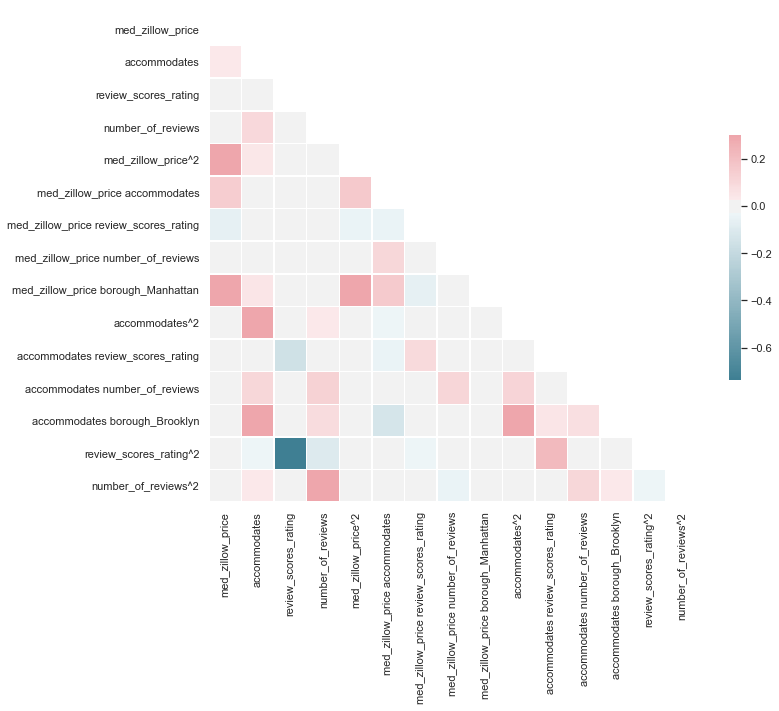

In [110]:
import seaborn as sns

sns.set(style="white")


# Compute the correlation matrix between selected features that have high variance
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [111]:
# Create correlation matrix, take absolute values of each correlation
corr_matrix = features_selected_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [116]:
upper

,med_zillow_price,accommodates,review_scores_rating,number_of_reviews,med_zillow_price^2,med_zillow_price accommodates,med_zillow_price review_scores_rating,med_zillow_price number_of_reviews,med_zillow_price borough_Manhattan,accommodates^2,accommodates review_scores_rating,accommodates number_of_reviews,accommodates borough_Brooklyn,review_scores_rating^2,number_of_reviews^2
med_zillow_price,NaN,0.038343,0.000533,0.010047,0.760055,0.145358,0.059008,0.026719,0.903527,0.002427,0.014464,0.006420,0.001486,0.006388,0.000605
accommodates,NaN,NaN,0.003986,0.099204,0.041425,0.008193,0.012418,0.006497,0.048161,0.720504,0.024546,0.108442,0.716315,0.029241,0.034244
review_scores_rating,NaN,NaN,NaN,0.016245,0.015740,0.011910,0.027531,0.017202,0.021153,0.006074,0.150112,0.011857,0.012865,0.736584,0.000749
number_of_reviews,NaN,NaN,NaN,NaN,0.006643,0.005929,0.016437,0.003279,0.003907,0.034263,0.013828,0.126367,0.086163,0.093669,0.790331
med_zillow_price^2,NaN,NaN,NaN,NaN,NaN,0.160686,0.041773,0.004368,0.906012,0.020396,0.013047,0.006846,0.001109,0.009504,0.005323
med_zillow_price accommodates,NaN,NaN,NaN,NaN,NaN,NaN,0.042133,0.109611,0.156945,0.029059,0.046241,0.026648,0.131249,0.010802,0.019843
med_zillow_price review_scores_rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005089,0.056915,0.013325,0.095936,0.000400,0.000100,0.028123,0.009068
med_zillow_price number_of_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015681,0.013249,0.000382,0.113731,0.017972,0.001657,0.042930
med_zillow_price borough_Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014855,0.017077,0.003627,0.002290,0.011482,0.005343
accommodates^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013655,0.114598,0.551077,0.008056,0.011274
